##  4.10A - Loading Dataset and Creating Variables 
###  This notebook loads the dataset from 4.9  and create variables for further analysis (age, income, department names mapped to department IDs, dependant staus). 
###  For each of the variables created, further analysis such as aggregation of data and extraction of data insights is conducted in additional notebooks. Due to low processing power of the computer, additional notebooks were created to process data visualizations and aggregate data based on the variables. This is to break up the amount of processing handled by one Jupyter notebook. 

### Importing Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Step 1 -  Importing Dataset from Task 4.9

In [2]:
dataset = pd.read_pickle(r"C:\Users\Windows\Instacart Basket Analysis\02 Data\Prepared Data\combined_dataset.pkl")

In [3]:
dataset.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,ord_freq_flag,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,19,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,12,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,12,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,10,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

In [5]:
dataset.shape

(32404859, 31)

In [6]:
# importing department dataset
df_dep = pd.read_csv(r"C:\Users\Windows\Instacart Basket Analysis\02 Data\Prepared Data\departments_wrangled.csv", index_col=0)

In [7]:
# checking department dataset
df_dep

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [8]:
# conerting department dataset to a dictionary
dict = df_dep['department'].to_dict()

In [9]:
dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

### Step 2 - The personal identifying information (PII) includes first name and surname. The information can be traced back to the user and once the user is known, further information about that person could well be exposed such as their credit card information, social security number, etc. As a junior analyst, it is wise to seek the company's policy with regard to dealing with PII and consult with colleagues to clarify.¶

In [10]:
# Due to memory issues, unable to remove these two columns. However, see the code above for dropping. 
# dataset.drop(columns = ['First Name', 'Surname'])

### Step 3 Create a "Region" column based on the "State" column from your customers data set.

In [11]:
# Creating region lists

Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [12]:
# Creating regional flag column

dataset.loc[dataset['State'].isin(Northeast),'Region']='Northeast'
dataset.loc[dataset['State'].isin(Midwest),'Region']='Midwest'
dataset.loc[dataset['State'].isin(South),'Region']='South'
dataset.loc[dataset['State'].isin(West),'Region']='West'

In [13]:
# Checking length of new column

len(dataset['Region'])

32404859

In [14]:
# Checking frequency of each region

dataset['Region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

### Step 3b Determine whether there's a difference in spending habits between the different U.S. regions.

In [15]:
# Creating a crosstab 

ct = pd.crosstab(dataset['Region'], dataset['spender_flag'],normalize=True, margins=True)

In [16]:
ct

spender_flag,High spender,Low spender,All
Region,,,
Midwest,0.004813,0.229637,0.234450
Northeast,0.003340,0.173261,0.176601
South,0.006471,0.326562,0.333033
West,0.004948,0.250967,0.255916
All,0.019573,0.980427,1.000000


#### As we can see, 33% of the spenders are from the South, who make up the majority of the consumers followed by Midwest, West and Northeast.   98% of the spenders are considered "Low spenders".  In terms of "High spenders", the South is also in first place, followed by Midwest, West, and Northeast.

### Step 4 Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Flag low-activity customers with less than 5 orders 

dataset.loc[dataset['max_order'] < 5, 'exclusion'] = 'Yes'

In [18]:
dataset.loc[dataset['max_order'] > 5, 'exclusion'] = 'No'

In [19]:
#Create dateframe for customers with less than 5 orders

excluded_customers = dataset[dataset['exclusion'] == 'Yes']

In [20]:
excluded_customers.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,exclusion
340,1,Chocolate Sandwich Cookies,19,19,5.8,652770,764,1,3,13,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes
341,1,Chocolate Sandwich Cookies,19,19,5.8,1813452,764,3,4,17,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes
342,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,19,19,1.7,652770,764,1,3,13,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes
343,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,19,19,1.7,705212,764,2,2,10,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes
344,3260,Chips Ahoy!/Nutter Butter/Oreo Cookies,19,19,1.7,1813452,764,3,4,17,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,Midwest,Yes


In [21]:
# export excluded_customers to a pickle file

path = r"C:\Users\Windows\Instacart Basket Analysis"

In [22]:
excluded_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

### Step 5 - Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [23]:
# Keep customers who generate more than 5 orders, create dataframe for only those customers

df = dataset[dataset['exclusion'] == 'No']

In [24]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,exclusion
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
1,1,Chocolate Sandwich Cookies,19,19,5.8,1977647,138,30,6,17,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
2,907,Premium Sliced Bacon,12,12,20.0,3160996,138,1,5,13,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
3,907,Premium Sliced Bacon,12,12,20.0,2254091,138,10,5,14,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No
4,1000,Apricots,10,10,12.9,505689,138,9,6,12,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,No


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404847
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

In [26]:
# changing variable type to reduce memory usage

df['Region'] = df['Region'].astype('category')

C:\Users\Windows\AppData\Local\Temp\ipykernel_7604\524374411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Region'].astype('category')


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404847
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

In [28]:
# drop the exclusion flag because dataset now only contains high activity customers, so exclusion flag no longer required.
# This is so that the dataset takes up less memory. 
df_1 = df.drop(columns = ['exclusion'])

In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404847
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

In [30]:
# Export the updated customer dataset containing only high-activity customers.
df_1.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers.pkl'))

In [31]:
df_1.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1,Chocolate Sandwich Cookies,19,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907,Premium Sliced Bacon,12,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907,Premium Sliced Bacon,12,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000,Apricots,10,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [32]:
df_1.shape

(30171424, 32)

#### Age Group Profile 

In [33]:
# Creating age profiling variable 

df_1.loc[df_1['Age']<=25, 'age_group']='Young Adult'
df_1.loc[(df_1['Age']<65)&(df_1['Age']>25), 'age_group']='Adult'
df_1.loc[df_1['Age']>=65, 'age_group']='Senior'

In [34]:
df_1['age_group'].value_counts(dropna=False)

Adult          18417604
Senior          7989725
Young Adult     3764095
Name: age_group, dtype: int64

In [35]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404847
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

In [36]:
# # changing variable type to reduce memory usage
df_1['age_group'] = df_1['age_group'].astype('category')

In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404847
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

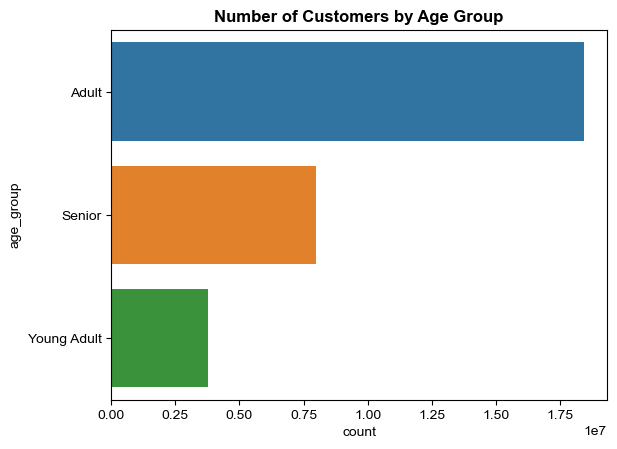

In [38]:
# Age profile visualization

# # bar=df['age_group'].value_counts().plot.bar(color =['blue', 'green', 'purple'])
# sns.barplot(data = df_1['age_group'].value_counts, x= 'Age Group', y='Number of Customers') 
# sns.set()
# sns.set_palette('colorblind')
# plt.show()

age_viz = sns.countplot(y='age_group', data=df_1)
sns.set()
sns.set_palette('colorblind')
plt.title ('Number of Customers by Age Group', fontweight='bold')
plt.show()

In [41]:
# Export Bar Chart

age_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fig1_age_viz.png'))

#### Income Profile


In [42]:
# adding a new variable to categorize customers based on income 
df_1.loc[df_1['income']<50000, 'income_group']='low income'
df_1.loc[(df_1['income']>=50000)&(df_1['income']<100000), 'income_group']='middle income'
df_1.loc[df_1['income']>= 100000, 'income_group']='high income'

In [43]:
# verifying "income_group" is added 
df_1.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region,age_group,income_group
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,low income
1,1,Chocolate Sandwich Cookies,19,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,low income
2,907,Premium Sliced Bacon,12,12,20.0,3160996,138,1,5,13,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,low income
3,907,Premium Sliced Bacon,12,12,20.0,2254091,138,10,5,14,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,low income
4,1000,Apricots,10,10,12.9,505689,138,9,6,12,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Senior,low income


In [44]:
# verifying the frequency in each group.
df_1['income_group'].value_counts(dropna=False)

high income      13864019
middle income    13058571
low income        3248834
Name: income_group, dtype: int64

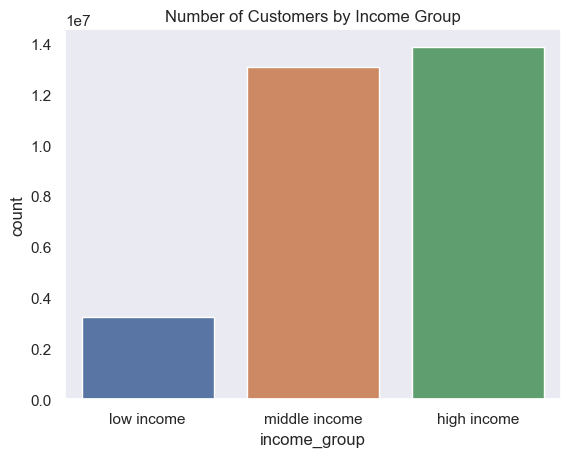

In [46]:
sns.set()
sns.set_style('dark')
sns.color_palette('colorblind')
income_viz = sns.countplot(x='income_group', data=df_1)
plt.title('Number of Customers by Income Group')
plt.show()

In [47]:
income_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fig2_income_viz.png'))

In [51]:
# create a new column "department" based on the mapping
# map department name to department_id
# recall the variable dict created to hold the dictionary of deparments and their ids
df_1['department'] = df_1['department_id'].map(dict)


In [52]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404847
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

In [53]:
# changing variable type to reduce memory usage

df_1['income_group'] = df_1['income_group'].astype('category')
df_1['department'] = df_1['department'].astype('category')

In [54]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30171424 entries, 0 to 32404847
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

In [55]:
df_1['department'].value_counts(dropna=False)

produce            8859944
dairy eggs         5053440
snacks             2699351
beverages          2507241
frozen             2059325
pantry             1732114
bakery             1092488
canned goods        982041
deli                978050
dry goods pasta     797683
household           678295
meat seafood        655729
breakfast           653419
personal care       411807
babies              403066
international       248722
alcohol             139573
pets                 90339
missing              62541
other                33415
bulk                 32841
Name: department, dtype: int64

#### Creating a variable for Dependants 

In [56]:
#Creating dependent group profiling variable

df_1.loc[df_1['n_dependants']>0, 'dependants']='Yes' 
df_1.loc[df_1['n_dependants']==0, 'dependants']='No'

In [57]:
df_1['dependants'].value_counts(dropna=False)

Yes    22632211
No      7539213
Name: dependants, dtype: int64

In [58]:
# Export the updated customer dataset containing only high-activity customers.
df_1.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_activity_customers_updated.pkl'))